In [1]:
import pandas as pd
import psutil
import plotly.express as px
import numpy as np
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import auc

In [2]:
def usage():
    total, available, percent, used, free_memory = psutil.virtual_memory()
    print("Total Memory: ", total)
    print("Available Memory: ", available)
    print("Used percentage: ", percent)
    print("Used Memory: ", used)
    print("Free memoryu: ", free_memory)


In [3]:
usage()

Total Memory:  16952647680
Available Memory:  11025215488
Used percentage:  35.0
Used Memory:  5927432192
Free memoryu:  11025215488


In [4]:
%%time

df = pd.read_csv(r"D:\Python\btc\dataset\unzipeed\BTCUSDT-1m\BTCUSDT-1m.csv")

df.shape

CPU times: total: 1min 22s
Wall time: 5min 22s


(1972772, 583)

In [5]:
usage()

Total Memory:  16952647680
Available Memory:  6474043392
Used percentage:  61.8
Used Memory:  10478604288
Free memoryu:  6474043392


In [6]:
df.columns

Index(['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_volume', 'count', 'taker_buy_volume',
       ...
       'PLUS_DM_233', 'ROC_233', 'ROCP_233', 'ROCR_233', 'ROCR100_233',
       'RSI_233', 'ATR_233', 'NATR_233', 'BETA_233', 'CORREL_233'],
      dtype='object', length=583)

In [7]:
df.select_dtypes(include="object").columns

Index(['open_time', 'close_time'], dtype='object')

In [8]:
df.drop(["open_time", "close_time"], axis=1, inplace=True)

In [9]:
df.drop(["entered_before", "longs_win_after", "shorts_win_after"], axis=1, inplace=True)

In [10]:
df.replace(np.nan, -500, inplace=True)

In [11]:
df.if_long.value_counts()

if_long
-1    1280470
 1     692222
 0         80
Name: count, dtype: int64

In [12]:
df["if_long"] = df["if_long"].replace(-1, 0)

In [13]:
df.if_long.value_counts()

if_long
0    1280550
1     692222
Name: count, dtype: int64

In [14]:
df["if_short"] = df["if_short"].replace(-1, 0)

In [15]:
df.if_short.value_counts()

if_short
0    1275151
1     697621
Name: count, dtype: int64

### Short model

In [16]:
df = df.drop("if_long", axis=1)

In [17]:
short_y = df["if_short"]

In [18]:
df = df.drop("if_short", axis=1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df, short_y, test_size=0.3)

In [20]:
usage()

Total Memory:  16952647680
Available Memory:  1613099008
Used percentage:  90.5
Used Memory:  15339548672
Free memoryu:  1613099008


In [21]:
del df
del short_y

In [22]:
usage()

Total Memory:  16952647680
Available Memory:  11135315968
Used percentage:  34.3
Used Memory:  5817331712
Free memoryu:  11135315968


In [23]:
short_clf = RandomForestClassifier(max_depth=100, random_state=0)

In [24]:
%%time

short_clf.fit(X_train, y_train)

CPU times: total: 3h 38min 40s
Wall time: 3h 51min 25s


RandomForestClassifier(max_depth=100, random_state=0)

In [25]:
import pickle

# Save the model to a file
with open("short_clf_100923.pkl", "wb") as f:
    pickle.dump(short_clf, f)

In [26]:
y_pred = short_clf.predict(X_test)

In [27]:
short_clf.score(X_test, y_test)

0.8980200462293354

In [28]:
cm = confusion_matrix(y_test, y_pred, labels=short_clf.classes_)

In [29]:
cm

array([[375330,   7021],
       [ 53334, 156147]], dtype=int64)

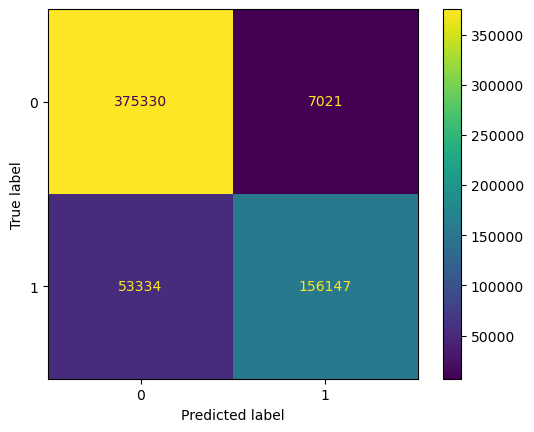

In [30]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=short_clf.classes_)

disp.plot()


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93    382351
           1       0.96      0.75      0.84    209481

    accuracy                           0.90    591832
   macro avg       0.92      0.86      0.88    591832
weighted avg       0.90      0.90      0.89    591832



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


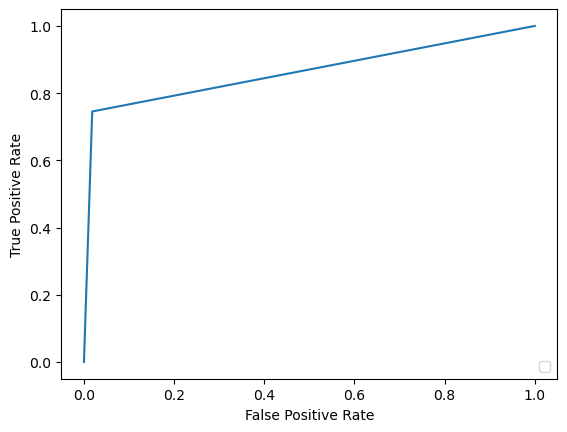

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=short_clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()